## 🔍 Initial Data Inspection

Before starting the data cleaning process, I perform a **quick exploratory check** to understand the structure, data types, and completeness of the dataset.  
This includes loading the data and reviewing sample rows, column information, and missing values.

The goal is to identify obvious issues and guide the subsequent cleaning steps.


In [1]:
import pandas as pd
df = pd.read_csv("cars_data.csv")
df.head()


,Title Main,Price,Registration Date,KM,Power,Fuel,Accident-Free
0,BMW 116,"€6,700",FR 12/2011,"100,750 km",100 kW (136 hp),Petrol,NaN
1,BMW 116,"€10,499",FR 08/2015,"107,000 km",80 kW (109 hp),Petrol,NaN
2,BMW 116,"€16,950",FR 04/2018,"76,732 km",80 kW (109 hp),Petrol,NaN
3,BMW 116,"€20,980¹",FR 04/2024,"14,800 km",80 kW (109 hp),Petrol,NaN
4,BMW 116,"€1,500",FR 08/2009,"221,493 km",90 kW (122 hp),Petrol,Accident-free


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2112 entries, 0 to 2111
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Title Main         2112 non-null   object
 1   Price              2112 non-null   object
 2   Registration Date  2101 non-null   object
 3   KM                 2101 non-null   object
 4   Power              2112 non-null   object
 5   Fuel               2111 non-null   object
 6   Accident-Free      1121 non-null   object
dtypes: object(7)
memory usage: 115.6+ KB


In [3]:
df.isna().sum()

Title Main             0
Price                  0
Registration Date     11
KM                    11
Power                  0
Fuel                   1
Accident-Free        991
dtype: int64

In [4]:
print(df['Price'].unique()[:10])
print(df['KM'].unique()[:10]) 
print(df['Power'].unique()[:10])

['€6,700' '€10,499' '€16,950' '€20,980¹' '€1,500' '€2,990' '€15,900¹'
 '€14,640' '€12,900' '€15,990']
['100,750 km' '107,000 km' '76,732 km' '14,800 km' '221,493 km'
 '198,000 km' '73,800 km' '84,000 km' '96,247 km' '78,658 km']
['100 kW (136 hp)' '80 kW (109 hp)' '90 kW (122 hp)' '85 kW (116 hp)'
 '110 kW (150 hp)' '105 kW (143 hp)' '103 kW (140 hp)' '125 kW (170 hp)'
 '75 kW (102 hp)' '61 kW (83 hp)']


## 🧹 Data Cleaning

### Goal
Transform the raw scraped listings into an **analysis-ready dataset** by standardizing formats, converting text fields into numerical features, and removing low-value columns.

### Target Dataset Structure

| Column | Final Type |
|------|-----------|
| Price | Numeric |
| KM | Numeric |
| Power | Numeric |
| Registration Date | Numeric (vehicle age in years) |
| Fuel | Binary |
| Accident-Free | Binary |
| Title Main | Categorical |
| Title Sub | Removed |


## 🗓️ Registration Date

I start by looking at the **Registration Date** column and checking for missing values.  
It turns out that the missing dates refer to **new cars**, while the goal of this project is to focus only on **second-hand vehicles**.

For this reason, rows with missing registration dates are **dropped** before moving forward.


In [5]:
df[df['Registration Date'].isna()]

,Title Main,Price,Registration Date,KM,Power,Fuel,Accident-Free
260,Dacia Duster,"€24,990¹",NaN,NaN,96 kW (131 hp),Petrol,NaN
768,Kia Stonic,"€20,800¹",NaN,NaN,74 kW (101 hp),Petrol,NaN
771,Kia Stonic,"€24,990¹",NaN,NaN,74 kW (101 hp),Petrol,NaN
1219,Renault Captur,"€32,998¹",NaN,NaN,116 kW (158 hp),Hybrid (petrol/electric),NaN
1475,Skoda Fabia,"€18,230¹",NaN,NaN,59 kW (80 hp),Petrol,NaN
1477,Skoda Fabia,"€20,390¹",NaN,NaN,85 kW (116 hp),Petrol,NaN
1664,Volkswagen Caddy,"€33,990¹",NaN,NaN,75 kW (102 hp),Diesel,NaN
1667,Volkswagen Caddy,"€46,990¹",NaN,NaN,90 kW (122 hp),Diesel,NaN
1669,Volkswagen Caddy,"€44,680¹",NaN,NaN,85 kW (116 hp),Petrol,NaN
1923,Volkswagen T-Roc,"€37,190¹",NaN,NaN,110 kW (150 hp),Petrol,NaN


In [6]:
# This are new Cars -> lets delete it
df = df.dropna(subset=['Registration Date'])
df.reset_index(drop=True, inplace=True)
df.isna().sum()


Title Main             0
Price                  0
Registration Date      0
KM                     0
Power                  0
Fuel                   1
Accident-Free        980
dtype: int64

## 🚗 Car Age (Years)

Next, I create a new feature called **Car_Age_Years**, which represents how old each car is in years.  
This is calculated from the registration date and is more intuitive to work with than the raw date.


In [7]:
from datetime import datetime

# Registration Date Column
df['Registration Date'] = pd.to_datetime(df['Registration Date'], format='FR %m/%Y', errors='coerce')
current_year = datetime.now().year
df['Car_Age_Years'] = current_year - df['Registration Date'].dt.year

df.sample(10)

,Title Main,Price,Registration Date,KM,Power,Fuel,Accident-Free,Car_Age_Years
1707,Volkswagen Caddy,"€23,900",2013-08-01,"100,000 km",75 kW (102 hp),Diesel,Accident-free,13
1738,Volkswagen Golf,"€30,956¹",2022-01-01,"80,000 km",221 kW (300 hp),Petrol,NaN,4
1715,Volkswagen Caddy,"€18,980",2013-07-01,"122,980 km",77 kW (105 hp),Petrol,NaN,13
870,Kia cee'd / Ceed,"€17,007",2020-02-01,"76,271 km",103 kW (140 hp),Petrol,Accident-free,6
1640,Skoda Scala,"€16,700",2019-11-01,"94,200 km",110 kW (150 hp),Petrol,Accident-free,7
854,Kia cee'd / Ceed,"€13,880",2018-03-01,"92,780 km",150 kW (204 hp),Petrol,Accident-free,8
1352,Renault Kadjar,"€14,950",2018-08-01,"84,110 km",96 kW (131 hp),Petrol,Accident-free,8
786,Kia Stonic,"€15,990",2018-05-01,"58,500 km",73 kW (99 hp),Petrol,NaN,8
1725,Volkswagen Golf,"€21,900",2017-09-01,"96,000 km",243 kW (330 hp),Petrol,Accident-free,9
218,Citroën C3,"€8,980",2018-06-01,"79,400 km",60 kW (82 hp),Petrol,Accident-free,8


## 🛣️ Mileage (KM)

I then clean the **KM** column by removing text and formatting characters (such as commas and the `"km"` suffix) so that the field can be safely converted into a numeric variable.


In [8]:
# KM Column
df['KM'] = (
    df['KM']
    .astype(str)                       # ensure it’s a string
    .str.replace('km', '', regex=False)   # remove text
    .str.replace(',', '', regex=False)    # remove thousands separator
    .astype(int))                        # convert to integer

df['KM'] = pd.to_numeric(df['KM']) 
df.sample(5)

,Title Main,Price,Registration Date,KM,Power,Fuel,Accident-Free,Car_Age_Years
1783,Volkswagen Polo,"€24,889¹",2025-06-01,6000,70 kW (95 hp),Petrol,Accident-free,1
1306,Renault Clio,"€14,980",2018-04-01,83439,147 kW (200 hp),Petrol,NaN,8
1895,Volkswagen T-Cross,"€17,900¹",2021-03-01,120000,110 kW (150 hp),Petrol,Accident-free,5
833,Kia cee'd / Ceed,"€2,200",2009-08-01,196050,93 kW (126 hp),Petrol,Accident-free,17
287,Dacia Duster,"€12,991",2018-12-01,80503,84 kW (114 hp),Petrol,Accident-free,8


## 💶 Price

Next, I clean the **Price** column by removing the euro symbol and formatting characters (such as commas) so the values can be converted into a numeric format.


In [9]:
# Price Column
df['Price'] = (
    df['Price'].astype(str)                       
    .str.replace('€', '', regex=False) # remove euro symbol
    .str.replace(',', '', regex=False) # remove thousands separator
    .str.replace('¹', '', regex=False) # remove any stray character
    .str.strip()                       # remove leading/trailing spaces
)

df['Price'] = pd.to_numeric(df['Price'])
df.sample(5)

,Title Main,Price,Registration Date,KM,Power,Fuel,Accident-Free,Car_Age_Years
293,Dacia Duster,11840,2017-09-01,75958,92 kW (125 hp),Petrol,Accident-free,9
1819,Volkswagen Polo,16900,2019-06-01,89056,147 kW (200 hp),Petrol,Accident-free,7
1408,Renault Megane,7200,2016-11-01,111000,74 kW (101 hp),Petrol,NaN,10
1444,Renault Megane,27900,2020-12-01,83899,221 kW (300 hp),Petrol,NaN,6
33,BMW 116,17900,2020-06-01,97566,85 kW (116 hp),Diesel,NaN,6


## ⚙️ Power

I then clean the **Power** column. The values contain both kilowatts and horsepower (e.g. `73 kW (99 hp)`), so I extract and keep **only the horsepower (hp)** value.


In [10]:
df['Power_HP'] = df['Power'].astype(str).str.extract(r'\((\d+)\s*hp\)')
df['Power_HP'] = pd.to_numeric(df['Power_HP']).astype('Int64')

df.sample(5)

,Title Main,Price,Registration Date,KM,Power,Fuel,Accident-Free,Car_Age_Years,Power_HP
656,Hyundai KONA,15850,2018-12-01,109000,130 kW (177 hp),Petrol,Accident-free,8,177
1268,Renault Captur,13490,2019-09-01,75337,110 kW (150 hp),Petrol,Accident-free,7,150
527,Ford Kuga,27999,2021-11-01,62541,140 kW (190 hp),Diesel,Accident-free,5,190
1436,Renault Megane,15599,2018-12-01,73500,117 kW (159 hp),Petrol,NaN,8,159
1624,Skoda Scala,17990,2020-10-01,76201,85 kW (116 hp),Petrol,Accident-free,6,116


## 🛡️ Accident-Free

Next, I clean the **Accident-Free** column by turning it into a **binary feature**:

- `1` if the car is accident-free  
- `0` otherwise



In [11]:
# Accident-Free Column
df['Accident_Free_Binary'] = df['Accident-Free'].notna().astype(int)
df.sample(5)


,Title Main,Price,Registration Date,KM,Power,Fuel,Accident-Free,Car_Age_Years,Power_HP,Accident_Free_Binary
238,Citroën C3,9990,2018-03-01,100900,81 kW (110 hp),Petrol,Accident-free,8,110,1
1349,Renault Kadjar,14990,2018-01-01,99701,96 kW (131 hp),Petrol,NaN,8,131,0
1084,Opel Corsa,12950,2016-09-01,58933,110 kW (150 hp),Petrol,NaN,10,150,0
1876,Volkswagen T-Cross,17880,2019-05-01,68642,85 kW (116 hp),Petrol,NaN,7,116,0
2027,Volkswagen Taigo,20970,2022-09-01,87914,81 kW (110 hp),Petrol,NaN,4,110,0


## ⚡ Fuel Type

The **Fuel** column has several categories (Petrol, Diesel, Electric, Hybrid).  
To simplify analysis, I grouped them into a **binary-like feature** called `Fuel_Group_ICE`:

- `1` -> for conventional internal combustion engines (Petrol, Diesel)  
- `0` -> for Electric and Hybrid vehicles

This makes comparisons and analysis much easier while keeping the distinction between traditional and electrified vehicles.

(Even though **Electric and Hybrid vehicles** are a small portion of the dataset, I decided to **keep them** and group them as `Electrified`.  
This preserves the distinction between **traditional internal combustion engines (ICE)** and **electrified vehicles**, which could be interesting for price or mileage analysis in future work.)


In [12]:
df['Fuel'].value_counts()

Petrol                      1813
Diesel                       208
Electric                      68
Hybrid (petrol/electric)      11
Name: Fuel, dtype: int64

In [13]:
df['Fuel_Group'] = df['Fuel'].replace({
    'Petrol': 'ICE',
    'Diesel': 'ICE',
    'Electric': 'Electrified',
    'Hybrid (petrol/electric)': 'Electrified'
})

df.sample(5)

,Title Main,Price,Registration Date,KM,Power,Fuel,Accident-Free,Car_Age_Years,Power_HP,Accident_Free_Binary,Fuel_Group
1871,Volkswagen T-Cross,20950,2021-03-01,79938,110 kW (150 hp),Petrol,Accident-free,5,150,1,ICE
68,BMW 118,16900,2020-11-01,78800,103 kW (140 hp),Petrol,Accident-free,6,140,1,ICE
1363,Renault Kadjar,12250,2016-09-01,109013,96 kW (131 hp),Petrol,NaN,10,131,0,ICE
700,Hyundai KONA,13390,2019-07-01,95506,88 kW (120 hp),Petrol,Accident-free,7,120,1,ICE
124,BMW 118,13240,2017-12-01,95676,100 kW (136 hp),Petrol,Accident-free,9,136,1,ICE


In [14]:
df = pd.get_dummies(df, columns=['Fuel_Group'], drop_first=True)
df.sample(5)

,Title Main,Price,Registration Date,KM,Power,Fuel,Accident-Free,Car_Age_Years,Power_HP,Accident_Free_Binary,Fuel_Group_ICE
468,Ford Focus,18650,2021-09-01,57690,111 kW (151 hp),Petrol,NaN,5,151,0,1
1295,Renault Clio,17290,2021-11-01,38682,117 kW (159 hp),Petrol,Accident-free,5,159,1,1
288,Dacia Duster,12330,2018-10-01,84116,84 kW (114 hp),Petrol,Accident-free,8,114,1,1
1283,Renault Clio,10990,2019-01-01,85333,54 kW (73 hp),Petrol,NaN,7,73,0,1
518,Ford Kuga,12500,2018-03-01,114000,110 kW (150 hp),Petrol,NaN,8,150,0,1


## 🏷️ Title Main (Brand-Model)

Finally, I take a look at the **Title Main** column, which represents the brand and model of each car.  

The goal is to understand:  
- How many cars are listed for each brand (should be similar as scrapped pages were the same)  
- Which specific models are present in the dataset  

This helps to get a sense of **models' variety** which can guide further analysis or filtering.


In [15]:
df['Title Main'].unique()

array(['BMW 116', 'BMW 118', 'BMW 216', 'Citroën C3', 'Dacia Duster',
       'Ford EcoSport', 'Ford Fiesta', 'Ford Focus', 'Ford Kuga',
       'Ford Puma', 'Hyundai KONA', 'Kia Rio', 'Kia Stonic',
       "Kia cee'd / Ceed", 'Mercedes-Benz Citan', 'Opel Astra',
       'Opel Corsa', 'Peugeot 2008', 'Peugeot 308', 'Renault Captur',
       'Renault Clio', 'Renault Kadjar', 'Renault Megane', 'Skoda Fabia',
       'Skoda Octavia', 'Skoda Scala', 'Volkswagen Caddy',
       'Volkswagen Golf', 'Volkswagen Golf Sportsvan', 'Volkswagen Polo',
       'Volkswagen T-Cross', 'Volkswagen T-Roc', 'Volkswagen Taigo',
       'Volkswagen e-up!'], dtype=object)

In [16]:
df['Brand'] = df['Title Main'].astype(str).str.split(' ').str[0]
df['Model'] = df['Title Main'].astype(str).str.split(' ').str[1]

# Group by the three columns and count occurrences
summary = df.groupby(['Title Main', 'Brand', 'Model']).size().reset_index(name='Count')

# Sort by count descending (optional)
summary = summary.sort_values(by='Count', ascending=False)

# Show the result
summary


,Title Main,Brand,Model,Count
0,BMW 116,BMW,116,64
14,Mercedes-Benz Citan,Mercedes-Benz,Citan,64
30,Volkswagen T-Cross,Volkswagen,T-Cross,64
29,Volkswagen Polo,Volkswagen,Polo,64
25,Skoda Scala,Skoda,Scala,64
24,Skoda Octavia,Skoda,Octavia,64
22,Renault Megane,Renault,Megane,64
21,Renault Kadjar,Renault,Kadjar,64
20,Renault Clio,Renault,Clio,64
18,Peugeot 308,Peugeot,308,64


## 🚫 Removing Utility & Niche Models

Some models in the dataset represent **different types of cars** than the ones we want to analyze:

- **Caddy** → Small van / utility vehicle, designed for cargo  
- **Golf Sportsvan** → Compact MPV, more like a mini minivan  
- **Citan** → Small commercial van  

These are different from typical passenger cars like **Volkswagen Golf**, **BMW 116**, or **Peugeot 2006**, which are personal-use cars.  

To keep the dataset focused on **standard second-hand passenger cars**, these utility/niche models are removed.


In [17]:
# List of models to drop
models_to_drop = ['Caddy', 'Golf Sportsvan', 'Citan']

# Keep only rows where Model is NOT in the list
df = df[~df['Model'].isin(models_to_drop)].reset_index(drop=True)

# Check
print(f"Number of rows after dropping {models_to_drop}: {len(df)}")

Number of rows after dropping ['Caddy', 'Golf Sportsvan', 'Citan']: 1976


## 🎯 Selecting Relevant Columns for EDA

Now that the dataset is cleaned, I select only the **columns relevant for analysis**:

- **Brand** → Brand
- **Model** → Model  
- **Price** → Price
- **Car_Age_Years** → Vehicle age in years  
- **KM** → Mileage  
- **Power_HP** → Engine power
- **Accident_Free_Binary** → Binary    
- **Fuel_Group_ICE** → Binary (ICE vs Electrified)    

This gives a tidy dataset ready for **exploratory data analysis (EDA)**.


In [18]:
df.sample(10)

,Title Main,Price,Registration Date,KM,Power,Fuel,Accident-Free,Car_Age_Years,Power_HP,Accident_Free_Binary,Fuel_Group_ICE,Brand,Model
1074,Peugeot 2008,12510,2017-08-01,89162,81 kW (110 hp),Petrol,Accident-free,9,110,1,1,Peugeot,2008
1922,Volkswagen e-up!,12950,2021-04-01,73877,61 kW (83 hp),Electric,NaN,5,83,0,0,Volkswagen,e-up!
1272,Renault Clio,16280,2020-10-01,87224,96 kW (131 hp),Petrol,NaN,6,131,0,1,Renault,Clio
583,Ford Puma,14990,2022-02-01,60201,70 kW (95 hp),Petrol,NaN,4,95,0,1,Ford,Puma
793,Kia Stonic,15950,2019-04-01,58929,62 kW (84 hp),Petrol,NaN,7,84,0,1,Kia,Stonic
63,BMW 116,12590,2017-03-01,85000,80 kW (109 hp),Petrol,Accident-free,9,109,1,1,BMW,116
743,Kia Rio,9490,2017-02-01,99600,73 kW (99 hp),Petrol,Accident-free,9,99,1,1,Kia,Rio
492,Ford Focus,26999,2017-06-01,87100,257 kW (349 hp),Petrol,Accident-free,9,349,1,1,Ford,Focus
626,Ford Puma,14880,2021-04-01,91786,92 kW (125 hp),Petrol,NaN,5,125,0,1,Ford,Puma
29,BMW 116,14470,2017-08-01,84930,85 kW (116 hp),Diesel,NaN,9,116,0,1,BMW,116


In [19]:
# Select only the relevant columns
df_analysis = df[[
    'Brand',
    'Model',
    'Price',
    'Car_Age_Years',
    'KM',
    'Power_HP',
    'Accident_Free_Binary',
    'Fuel_Group_ICE',
]]

df_analysis.sample(5)


,Brand,Model,Price,Car_Age_Years,KM,Power_HP,Accident_Free_Binary,Fuel_Group_ICE
1252,Renault,Clio,11490,10,99000,200,1,1
1839,Volkswagen,T-Roc,21450,5,52700,150,1,1
892,Kia,cee'd,13999,11,96456,204,1,1
1166,Renault,Captur,13730,9,72058,118,1,1
1884,Volkswagen,Taigo,18890,3,86283,110,0,1


## 🔍 Exploratory Data Analysis (EDA)

Time to explore the cleaned dataset!  
First, I take a quick look at:

- The **shape** of the dataset  
- The **columns and data types**  
- Any **missing values**  
- Basic **summary statistics** with `.describe()`

This helps understand the dataset at a glance and guides deeper analysis.


In [20]:
# Shape and column names
print(df_analysis.shape)
print(df_analysis.columns)

# Data types
print(df_analysis.dtypes)

# Missing values
print(df_analysis.isna().sum())


(1976, 8)
Index(['Brand', 'Model', 'Price', 'Car_Age_Years', 'KM', 'Power_HP',
       'Accident_Free_Binary', 'Fuel_Group_ICE'],
      dtype='object')
Brand                   object
Model                   object
Price                    int64
Car_Age_Years            int64
KM                       int32
Power_HP                 Int64
Accident_Free_Binary     int32
Fuel_Group_ICE           uint8
dtype: object
Brand                   0
Model                   0
Price                   0
Car_Age_Years           0
KM                      0
Power_HP                0
Accident_Free_Binary    0
Fuel_Group_ICE          0
dtype: int64


In [21]:
df_analysis.describe()


,Price,Car_Age_Years,KM,Power_HP,Accident_Free_Binary,Fuel_Group_ICE
count,1976.000000,1976.000000,1976.000000,1976.000000,1976.000000,1976.000000
mean,16241.722672,7.242915,82256.546053,142.145243,0.530364,0.959514
std,4810.511355,2.353064,24196.198004,48.798181,0.499203,0.197146
min,520.000000,1.000000,2.000000,54.000000,0.000000,0.000000
25%,12949.750000,6.000000,69996.750000,110.000000,0.000000,1.000000
50%,15884.500000,7.000000,83440.000000,131.000000,1.000000,1.000000
75%,18990.000000,9.000000,96225.250000,155.000000,1.000000,1.000000
max,44850.000000,20.000000,221493.000000,349.000000,1.000000,1.000000


## 🚘 Counts by Brand, Model, and Key Features

Next, I explore the dataset to see:  

- How many cars there are **per brand**  
- Distribution of **Accident-Free** cars  
- Distribution of **Fuel type** (ICE vs Electrified)  

Since we retrieved a **similar number of cars for each model**, brands with more cars in the dataset mean that **more models from that brand appeared** in our initial data scraping (filtered for **<15k€** and **from 2020 onwards**).  


In [22]:
# Brand
print(df_analysis['Brand'].value_counts())

# Accident-Free
print(df_analysis['Accident_Free_Binary'].value_counts())

# Accident-Free
print(df_analysis['Fuel_Group_ICE'].value_counts())


Volkswagen    382
Ford          320
Renault       255
BMW           192
Kia           190
Skoda         190
Opel          128
Peugeot       128
Citroën        64
Hyundai        64
Dacia          63
Name: Brand, dtype: int64
1    1048
0     928
Name: Accident_Free_Binary, dtype: int64
1    1896
0      80
Name: Fuel_Group_ICE, dtype: int64


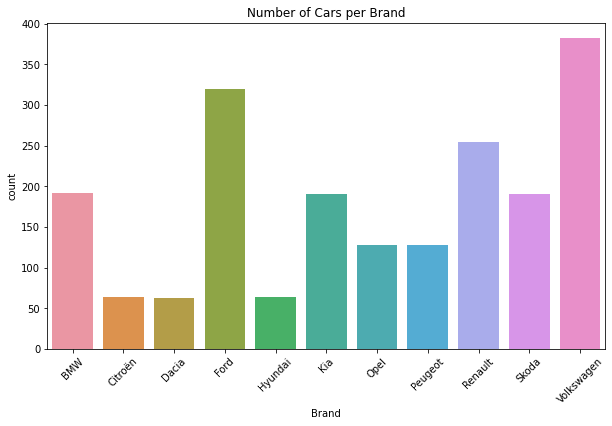

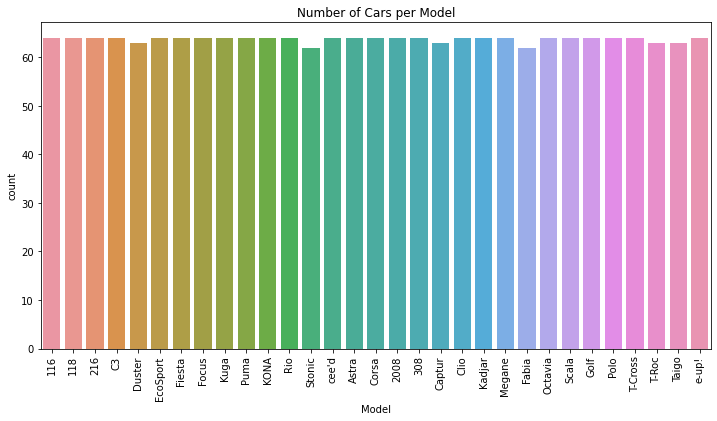

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: count of cars per Brand
plt.figure(figsize=(10,6))
sns.countplot(x='Brand', data=df)
plt.xticks(rotation=45)
plt.title("Number of Cars per Brand")
plt.show()

# Example: count of cars per Model
plt.figure(figsize=(12,6))
sns.countplot(x='Model', data=df)
plt.xticks(rotation=90)
plt.title("Number of Cars per Model")
plt.show()


## 💰 Average Price by Brand and Fuel Type

I also check the **average price** for each brand and for ICE vs Electrified cars.  

Some interesting observations:  
- **Volkswagen** has the highest average price - probably because models like **Taigo, T-Cross, and T-Roc** are priced higher.  
- **Citroën** has the lowest average, as the only model in the dataset is the **C3**, which is a smaller, lower-priced car.
- **Electrified cars** have a lower average price, which is explained by the fact that most electrified vehicles in the dataset are the **VW e-Up**, a small and relatively affordable electric car.  


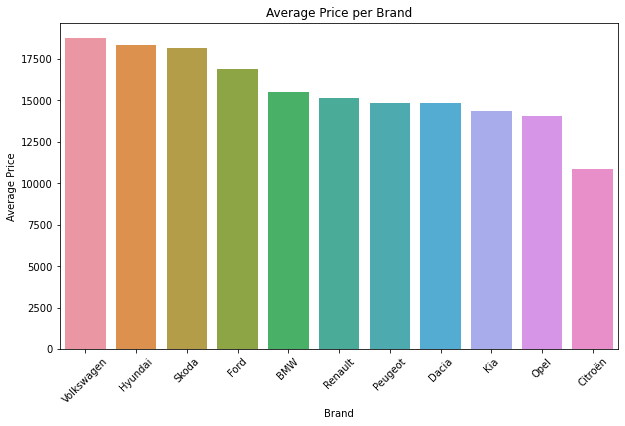

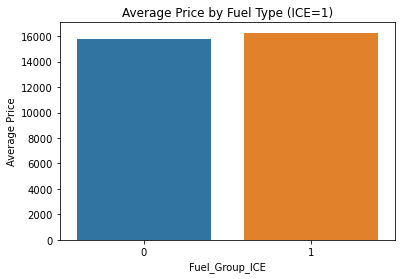

In [24]:
# Average Price by Brand
avg_price_brand = df.groupby('Brand')['Price'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=avg_price_brand.index, y=avg_price_brand.values)
plt.xticks(rotation=45)
plt.ylabel("Average Price")
plt.title("Average Price per Brand")
plt.show()

# Average Price by Fuel type
avg_price_fuel = df.groupby('Fuel_Group_ICE')['Price'].mean()

plt.figure(figsize=(6,4))
sns.barplot(x=avg_price_fuel.index, y=avg_price_fuel.values)
plt.ylabel("Average Price")
plt.title("Average Price by Fuel Type (ICE=1)")
plt.show()


## 📊 Distributions of Key Numerical Features

Next, I visualize the distributions of the main numeric features:

- **Price**  
- **KM (Mileage)**  
- **Car Age (Years)**  
- **Horsepower**

Observations from the distributions:  
- **Price** is **right-skewed**, meaning there are a few more expensive cars pulling the average up.  
- **KM** and **Car Age** are more **normally distributed**, which is nice for analysis.  

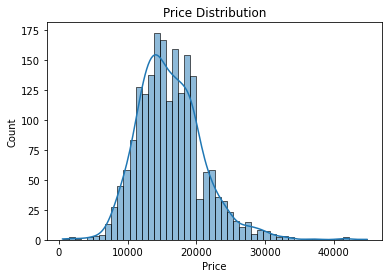

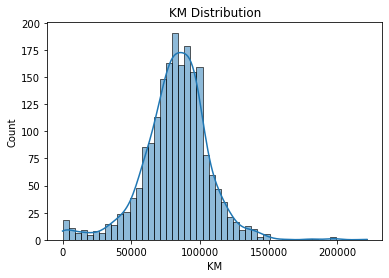

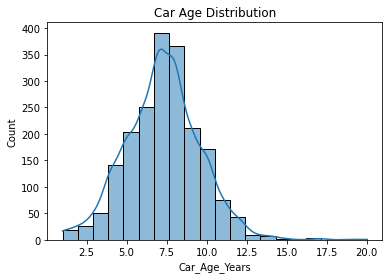

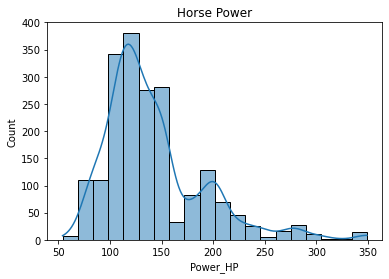

In [25]:
# Price distribution
sns.histplot(df_analysis['Price'], bins=50, kde=True)
plt.title("Price Distribution")
plt.show()

# KM distribution
sns.histplot(df_analysis['KM'], bins=50, kde=True)
plt.title("KM Distribution")
plt.show()

# Car age distribution
sns.histplot(df_analysis['Car_Age_Years'], bins=20, kde=True)
plt.title("Car Age Distribution")
plt.show()

# Power
sns.histplot(df_analysis['Power_HP'], bins=20, kde=True)
plt.title("Horse Power")
plt.show()


## 📉 Relationships with Car Age

Now, I explore how the numeric features relate to **Car Age** and **Price**:

- As expected, **Price** and **Car Age** are **negatively correlated** — older cars tend to be cheaper.  
- **Price** and **KM** are also **negatively correlated** — cars with higher mileage usually cost less.  
- **Price** and **Horsepower** are **positively correlated** — more powerful cars tend to have higher prices.  


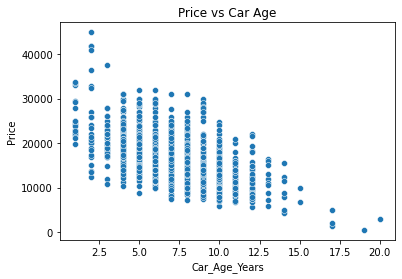

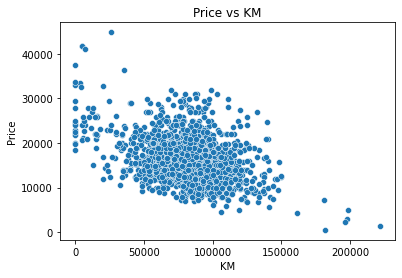

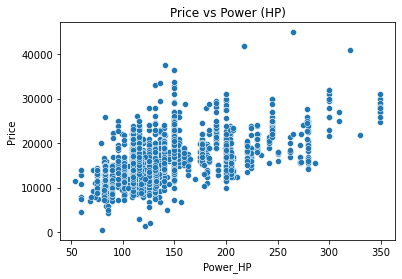

In [26]:
# Scatter plots
sns.scatterplot(x='Car_Age_Years', y='Price', data=df_analysis)
plt.title("Price vs Car Age")
plt.show()

sns.scatterplot(x='KM', y='Price', data=df_analysis)
plt.title("Price vs KM")
plt.show()

sns.scatterplot(x='Power_HP', y='Price', data=df_analysis)
plt.title("Price vs Power (HP)")
plt.show()



## 📦 Price Distribution by Key Categories

To further explore **how categorical features relate to price**, I plotted boxplots for:

- **Fuel type** (ICE vs Electrified)  
- **Accident-Free status** (Yes vs No)  
- **Brand / Model**

Observations:  
- **Fuel**: ICE cars tend to have a **higher median price**, while electrified cars are mostly smaller and cheaper models.  
- **Brand**: Volkswagen and BMW show higher prices, while brands like Citroën and Dacia are lower.  
- **Models**: When looking at boxplots by model, **Volkswagen Golf** and **Ford Focus** show a relatively high upper range (Q3 + 1.5×IQR). This is likely explained by the presence of **high-performance variants** (e.g. *Golf GTI/R*, *Focus RS*), which push the upper tail of the price distribution.

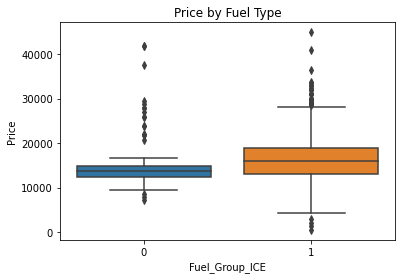

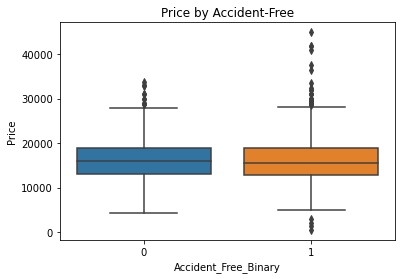

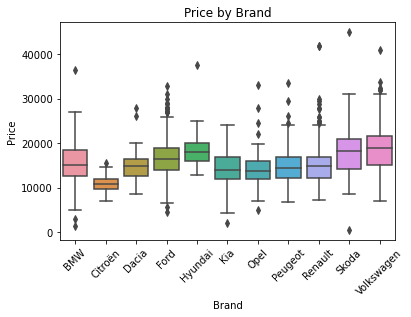

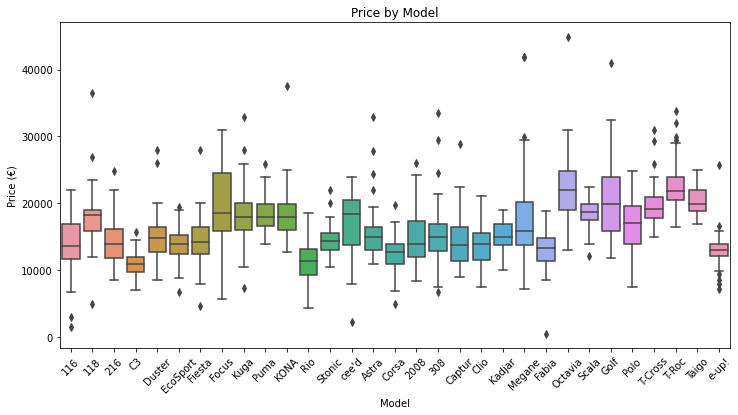

In [27]:
# Boxplot: Price by Fuel_Group
sns.boxplot(x='Fuel_Group_ICE', y='Price', data=df_analysis)
plt.title("Price by Fuel Type")
plt.show()

# Boxplot: Price by Accident-Free
sns.boxplot(x='Accident_Free_Binary', y='Price', data=df_analysis)
plt.title("Price by Accident-Free")
plt.show()

# Boxplot: Price by Brand 
top_brands = df_analysis['Brand'].value_counts().head(10).index
sns.boxplot(x='Brand', y='Price', data=df_analysis)
plt.title("Price by Brand")
plt.xticks(rotation=45)
plt.show()

# Create boxplot: Price by Model
plt.figure(figsize=(12,6))
sns.boxplot(x='Model', y='Price', data=df_analysis)
plt.title("Price by Model")
plt.xlabel("Model")
plt.ylabel("Price (€)")
plt.xticks(rotation=45)  # rotate labels for readability
plt.show()



## 🔎 Checking Outliers in Car Age

Next, I look at **outliers in `Car_Age_Years`** using the standard IQR method.  

Observations:  
- Some **lower-end outliers** include cars with **very low mileage** (like 2 or 15 km), which is unusual and rare - I’ll handle these later.  
- On the **upper end**, there are cars with **high ages** (up to 20 years), but these don’t seem like data errors because these cars also have **high KM**, so they are realistic older cars.  


In [28]:
import pandas as pd

# Column to check
col = 'Car_Age_Years'

# Compute boxplot statistics
Q1 = df_analysis[col].quantile(0.25)
Q3 = df_analysis[col].quantile(0.75)
IQR = Q3 - Q1
lower_whisker = Q1 - 1.5 * IQR
upper_whisker = Q3 + 1.5 * IQR

# Identify outliers
lower_outliers = df_analysis[df_analysis[col] < lower_whisker]
upper_outliers = df_analysis[df_analysis[col] > upper_whisker]

# Combine into one dataframe with a column marking lower/upper
outliers_df = pd.concat([
    lower_outliers.assign(Outlier_Type='Lower'),
    upper_outliers.assign(Outlier_Type='Upper')
])

# Print summary
print(f"Column: {col}")
print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
print(f"Lower whisker: {lower_whisker}, Upper whisker: {upper_whisker}")
print(f"Number of lower-end outliers: {len(lower_outliers)}")
print(f"Number of upper-end outliers: {len(upper_outliers)}")
print("\nOutlier rows:")
outliers_df


Column: Car_Age_Years
Q1: 6.0, Q3: 9.0, IQR: 3.0
Lower whisker: 1.5, Upper whisker: 13.5
Number of lower-end outliers: 19
Number of upper-end outliers: 15

Outlier rows:


,Brand,Model,Price,Car_Age_Years,KM,Power_HP,Accident_Free_Binary,Fuel_Group_ICE,Outlier_Type
259,Dacia,Duster,27900,1,15,131,1,0,Lower
575,Ford,Puma,22950,1,10,125,1,1,Lower
770,Kia,Stonic,21970,1,8,99,1,1,Lower
832,Kia,cee'd,23980,1,5155,140,1,1,Lower
834,Kia,cee'd,21880,1,10,101,1,1,Lower
896,Opel,Astra,24455,1,12,131,0,1,Lower
898,Opel,Astra,32950,1,2,131,0,1,Lower
962,Opel,Corsa,19785,1,2,101,0,1,Lower
1024,Peugeot,2008,24185,1,75,131,0,1,Lower
1085,Peugeot,308,33490,1,3500,136,1,1,Lower


## 🛣️ Cleaning Low-KM Outliers

Following the previous outlier check, I take a closer look at the **KM (mileage)** values.  
Cars with **less than 200 km** are either data issues or essentially **new cars**, which are not relevant for this second-hand car analysis.

For this reason, I remove observations with **KM < 200** before continuing.


In [29]:
# Show all rows
pd.set_option('display.max_rows', None)

In [30]:
# Column to check
col = 'KM'

# Compute boxplot statistics
Q1 = df_analysis[col].quantile(0.25)
Q3 = df_analysis[col].quantile(0.75)
IQR = Q3 - Q1
lower_whisker = Q1 - 1.5 * IQR
upper_whisker = Q3 + 1.5 * IQR

# Identify outliers
lower_outliers = df_analysis[df_analysis[col] < lower_whisker]
upper_outliers = df_analysis[df_analysis[col] > upper_whisker]

# Combine into one dataframe with a column marking lower/upper
outliers_df = pd.concat([
    lower_outliers.assign(Outlier_Type='Lower'),
    upper_outliers.assign(Outlier_Type='Upper')
])

# Print summary
print(f"Column: {col}")
print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
print(f"Lower whisker: {lower_whisker}, Upper whisker: {upper_whisker}")
print(f"Number of lower-end outliers: {len(lower_outliers)}")
print(f"Number of upper-end outliers: {len(upper_outliers)}")
print("\nOutlier rows:")
outliers_df


Column: KM
Q1: 69996.75, Q3: 96225.25, IQR: 26228.5
Lower whisker: 30654.0, Upper whisker: 135568.0
Number of lower-end outliers: 62
Number of upper-end outliers: 33

Outlier rows:


,Brand,Model,Price,Car_Age_Years,KM,Power_HP,Accident_Free_Binary,Fuel_Group_ICE,Outlier_Type
3,BMW,116,20980,2,14800,109,0,1,Lower
191,BMW,216,16550,7,28659,109,0,1,Lower
192,Citroën,C3,11990,3,20000,83,0,1,Lower
196,Citroën,C3,12490,2,25405,110,1,1,Lower
259,Dacia,Duster,27900,1,15,131,1,0,Lower
260,Dacia,Duster,25987,3,29869,114,1,1,Lower
388,Ford,Fiesta,27900,3,9500,125,1,1,Lower
447,Ford,Focus,26990,2,12272,155,1,0,Lower
515,Ford,Kuga,32900,2,19912,150,0,1,Lower
575,Ford,Puma,22950,1,10,125,1,1,Lower


In [31]:
# Reset options back to default if you want
pd.reset_option('display.max_rows')


In [32]:
# Filter rows where KM < 2000
low_km_cars = df_analysis[df_analysis['KM'] < 1000]

# Print the result
low_km_cars

,Brand,Model,Price,Car_Age_Years,KM,Power_HP,Accident_Free_Binary,Fuel_Group_ICE
259,Dacia,Duster,27900,1,15,131,1,0
575,Ford,Puma,22950,1,10,125,1,1
643,Hyundai,KONA,37600,3,17,141,1,0
769,Kia,Stonic,19990,2,10,79,1,1
770,Kia,Stonic,21970,1,8,99,1,1
834,Kia,cee'd,21880,1,10,101,1,1
896,Opel,Astra,24455,1,12,131,0,1
898,Opel,Astra,32950,1,2,131,0,1
962,Opel,Corsa,19785,1,2,101,0,1
1024,Peugeot,2008,24185,1,75,131,0,1


In [33]:
# Remove rows where KM < 200
df_analysis = df_analysis[df_analysis['KM'] >= 200].reset_index(drop=True)

# Check how many rows remain
print(f"Number of rows after removing KM < 200: {len(df_analysis)}")


Number of rows after removing KM < 200: 1960


## ⚙️ Checking Outliers in Power (HP)

Next, I check outliers in **Power (HP)** using the IQR method.  
Using the standard **1.5×IQR** threshold resulted in a large number of outliers, so I also tested a **more relaxed 3×IQR** threshold.

With this approach:
- No **lower-end outliers** were detected  
- A few **upper-end outliers** remained  

Looking at these high-power cars, many of them are models like **Volkswagen Golf**, **Ford Focus**, and **Renault Mégane**. At first, power levels around **300 HP** seemed odd for these cars.  
After further inspection, I found that these correspond to **high-performance variants** (e.g. *Golf R / GTI, Focus RS, Mégane RS*).

Since these are **real and valid vehicles**, I decide **not to remove them**.  
However, this is something to keep in mind for future modeling, as these variants may behave differently from standard versions of the same models.


In [34]:
# Column to check
col = 'Power_HP'

# Compute boxplot statistics
Q1 = df_analysis[col].quantile(0.25)
Q3 = df_analysis[col].quantile(0.75)
IQR = Q3 - Q1
lower_whisker = Q1 - 1.5 * IQR
upper_whisker = Q3 + 1.5 * IQR

# Identify outliers
lower_outliers = df_analysis[df_analysis[col] < lower_whisker]
upper_outliers = df_analysis[df_analysis[col] > upper_whisker]

# Combine into one dataframe with a column marking lower/upper
outliers_df = pd.concat([
    lower_outliers.assign(Outlier_Type='Lower'),
    upper_outliers.assign(Outlier_Type='Upper')
])

# Print summary
print(f"Column: {col}")
print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
print(f"Lower whisker: {lower_whisker}, Upper whisker: {upper_whisker}")
print(f"Number of lower-end outliers: {len(lower_outliers)}")
print(f"Number of upper-end outliers: {len(upper_outliers)}")
print("\nOutlier rows:")
outliers_df


Column: Power_HP
Q1: 110, Q3: 155, IQR: 45
Lower whisker: 42.5, Upper whisker: 222.5
Number of lower-end outliers: 0
Number of upper-end outliers: 137

Outlier rows:


,Brand,Model,Price,Car_Age_Years,KM,Power_HP,Accident_Free_Binary,Fuel_Group_ICE,Outlier_Type
468,Ford,Focus,28850,9,79616,349,1,1,Upper
471,Ford,Focus,29850,9,78428,349,1,1,Upper
472,Ford,Focus,28990,9,78709,349,1,1,Upper
473,Ford,Focus,17520,9,99985,250,0,1,Upper
474,Ford,Focus,24490,7,89474,280,0,1,Upper
...,...,...,...,...,...,...,...,...,...
1638,Volkswagen,Golf,21950,8,98027,245,0,1,Upper
1639,Volkswagen,Golf,21699,12,83900,300,1,1,Upper
1640,Volkswagen,Golf,20900,11,82000,230,0,1,Upper
1777,Volkswagen,T-Roc,31990,6,98400,300,1,1,Upper


In [35]:
# Column to check
col = 'Power_HP'

# Compute boxplot statistics
Q1 = df_analysis[col].quantile(0.25)
Q3 = df_analysis[col].quantile(0.75)
IQR = Q3 - Q1
lower_whisker = Q1 - 3 * IQR
upper_whisker = Q3 + 3 * IQR

# Identify outliers
lower_outliers = df_analysis[df_analysis[col] < lower_whisker]
upper_outliers = df_analysis[df_analysis[col] > upper_whisker]

# Combine into one dataframe with a column marking lower/upper
outliers_df = pd.concat([
    lower_outliers.assign(Outlier_Type='Lower'),
    upper_outliers.assign(Outlier_Type='Upper')
])

# Print summary
print(f"Column: {col}")
print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
print(f"Lower whisker: {lower_whisker}, Upper whisker: {upper_whisker}")
print(f"Number of lower-end outliers: {len(lower_outliers)}")
print(f"Number of upper-end outliers: {len(upper_outliers)}")
print("\nOutlier rows:")
outliers_df


Column: Power_HP
Q1: 110, Q3: 155, IQR: 45
Lower whisker: -25, Upper whisker: 290
Number of lower-end outliers: 0
Number of upper-end outliers: 30

Outlier rows:


,Brand,Model,Price,Car_Age_Years,KM,Power_HP,Accident_Free_Binary,Fuel_Group_ICE,Outlier_Type
468,Ford,Focus,28850,9,79616,349,1,1,Upper
471,Ford,Focus,29850,9,78428,349,1,1,Upper
472,Ford,Focus,28990,9,78709,349,1,1,Upper
475,Ford,Focus,26980,9,93218,349,1,1,Upper
476,Ford,Focus,27700,9,92500,349,1,1,Upper
482,Ford,Focus,27990,9,95250,349,1,1,Upper
483,Ford,Focus,27900,9,94425,349,0,1,Upper
485,Ford,Focus,27990,9,83000,349,1,1,Upper
489,Ford,Focus,26970,9,89000,349,1,1,Upper
491,Ford,Focus,26999,9,87100,349,1,1,Upper


## 💸 Checking Outliers in Price

I also checked for **outliers in Price** using the IQR method. Overall, the results look reasonable.

- **Lower-end outliers** correspond to cars with **high mileage and higher age**, which explains their low prices.  
- **Upper-end outliers** include models such as **VW T-Cross**, **VW T-Roc**, **Ford Focus**, and **Škoda Octavia**, which are newer or better-equipped cars and therefore priced higher.

Since these prices are consistent with the car characteristics, **no price outliers are removed**.


In [36]:
# Column to check
col = 'Price'

# Compute boxplot statistics
Q1 = df_analysis[col].quantile(0.25)
Q3 = df_analysis[col].quantile(0.75)
IQR = Q3 - Q1
lower_whisker = Q1 - 1.5 * IQR
upper_whisker = Q3 + 1.5 * IQR

# Identify outliers
lower_outliers = df_analysis[df_analysis[col] < lower_whisker]
upper_outliers = df_analysis[df_analysis[col] > upper_whisker]

# Combine into one dataframe with a column marking lower/upper
outliers_df = pd.concat([
    lower_outliers.assign(Outlier_Type='Lower'),
    upper_outliers.assign(Outlier_Type='Upper')
])

# Print summary
print(f"Column: {col}")
print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
print(f"Lower whisker: {lower_whisker}, Upper whisker: {upper_whisker}")
print(f"Number of lower-end outliers: {len(lower_outliers)}")
print(f"Number of upper-end outliers: {len(upper_outliers)}")
print("\nOutlier rows:")
outliers_df


Column: Price
Q1: 12940.0, Q3: 18980.0, IQR: 6040.0
Lower whisker: 3880.0, Upper whisker: 28040.0
Number of lower-end outliers: 4
Number of upper-end outliers: 34

Outlier rows:


,Brand,Model,Price,Car_Age_Years,KM,Power_HP,Accident_Free_Binary,Fuel_Group_ICE,Outlier_Type
4,BMW,116,1500,17,221493,122,1,1,Lower
5,BMW,116,2990,20,198000,116,1,1,Lower
828,Kia,cee'd,2200,17,196050,126,1,1,Lower
1395,Skoda,Fabia,520,19,181819,80,1,1,Lower
64,BMW,118,36450,2,35195,150,1,1,Upper
468,Ford,Focus,28850,9,79616,349,1,1,Upper
471,Ford,Focus,29850,9,78428,349,1,1,Upper
472,Ford,Focus,28990,9,78709,349,1,1,Upper
508,Ford,Focus,30999,8,88900,349,1,1,Upper
514,Ford,Kuga,32900,2,19912,150,0,1,Upper


## 🔗 Correlation Analysis

Lastly, I take a look at the **correlation matrix** to understand how the main numerical features relate to each other and to price.

Some key takeaways:
- **Price** has a **negative correlation** with both **KM** and **Car Age**, which makes sense — older cars with higher mileage tend to be cheaper.
- **Power (HP)** shows a **positive correlation** with price, indicating that more powerful cars are generally more expensive.
- **KM** and **Car Age** are **moderately positively correlated** (~0.46), which is expected but could be an issue for **linear regression models** due to multicollinearity.
- **Accident-Free** and **Fuel type** show very low linear correlation with price, although this may reflect limitations of correlation measures on categorical features rather than lack of predictive value.

To address potential multicollinearity, this is something to **check later using VIF**.  
If needed, there is also the option to **combine these variables through feature engineering**, for example by creating a **KM per year** metric.

In [37]:
df_analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1960 entries, 0 to 1959
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Brand                 1960 non-null   object
 1   Model                 1960 non-null   object
 2   Price                 1960 non-null   int64 
 3   Car_Age_Years         1960 non-null   int64 
 4   KM                    1960 non-null   int32 
 5   Power_HP              1960 non-null   Int64 
 6   Accident_Free_Binary  1960 non-null   int32 
 7   Fuel_Group_ICE        1960 non-null   uint8 
dtypes: Int64(1), int32(2), int64(2), object(2), uint8(1)
memory usage: 95.8+ KB


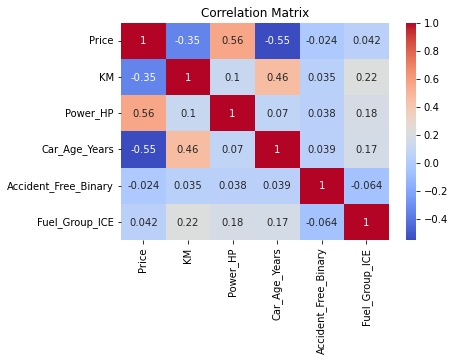

In [38]:
# Correlation matrix for numeric columns
numeric_cols = ['Price', 'KM', 'Power_HP', 'Car_Age_Years', 'Accident_Free_Binary', 'Fuel_Group_ICE']
corr = df_analysis[numeric_cols].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [39]:
df_analysis['KM_per_Year'] = df_analysis['KM'] / df_analysis['Car_Age_Years']

df_analysis.sample(10)

,Brand,Model,Price,Car_Age_Years,KM,Power_HP,Accident_Free_Binary,Fuel_Group_ICE,KM_per_Year
430,Ford,Fiesta,10590,11,82300,101,1,1,7481.818182
1007,Opel,Corsa,12990,6,92500,101,0,1,15416.666667
689,Hyundai,KONA,14990,8,68341,120,0,1,8542.625000
6,BMW,116,15900,10,73800,109,1,1,7380.000000
1753,Volkswagen,T-Cross,19950,7,55664,116,0,1,7952.000000
1344,Renault,Megane,25900,7,94000,300,1,1,13428.571429
1600,Volkswagen,Golf,30956,4,80000,300,0,1,20000.000000
1841,Volkswagen,Taigo,20689,4,96497,150,0,1,24124.250000
291,Dacia,Duster,12990,7,103900,150,1,1,14842.857143
601,Ford,Puma,15400,6,87174,125,1,1,14529.000000


In [40]:
df_analysis.to_csv('df_models.csv', index=False)